#📌 Extracão

In [56]:
# ler o arquivo .json e criar um dataframe
import requests
import json
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_clientes = requests.get(url)
resultado = json.loads(dados_clientes.text)

# normalizar os dados e importar a biblioteca Pandas
import pandas as pd

dados_clientes_normalizado = pd.json_normalize(resultado, sep='_')
df_clientes = dados_clientes_normalizado
df_clientes.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [57]:
# visualizar os nomes das colunas
df_clientes.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [58]:
# verificar os tipos de dados
df_clientes.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [59]:
# Verificar os valores únicos em cada coluna
for coluna in df_clientes.columns:
    valores_unicos = df_clientes[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores únicos na coluna customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


Valores únicos na coluna Churn:
['No' 'Yes' '']


Valores únicos na coluna customer_gender:
['Female' 'Male']


Valores únicos na coluna customer_SeniorCitizen:
[0 1]


Valores únicos na coluna customer_Partner:
['Yes' 'No']


Valores únicos na coluna customer_Dependents:
['Yes' 'No']


Valores únicos na coluna customer_tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


Valores únicos na coluna phone_PhoneService:
['Yes' 'No']


Valores únicos na coluna phone_MultipleLines:
['No' 'Yes' 'No phone service']


Valores únicos na coluna internet_InternetService:
['DSL' 'Fiber optic' 'No']


Valores únicos na coluna internet_OnlineSecurity:
['No' 'Yes' 'No internet service']


Valores único

In [60]:
# Verificar se há linhas duplicadas
linhas_duplicadas = df_clientes.duplicated()

# Contar o número de linhas duplicadas
numero_linhas_duplicadas = linhas_duplicadas.sum()
print(f'\nNúmero de linhas duplicadas: {numero_linhas_duplicadas}')


Número de linhas duplicadas: 0


In [61]:
# converter a coluna (account_Charges_Total) de object para float64
df_clientes['account_Charges_Total'] = pd.to_numeric(df_clientes['account_Charges_Total'], errors='coerce')
df_clientes.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [62]:
# verificar se existe algum dado nulo
total_nulos = df_clientes.isnull().sum()

# Imprimindo as colunas com valores nulos
for col in df_clientes.columns:
  if total_nulos[col] > 0:
    print(f'A coluna {col} possui {total_nulos[col]} valores nulos')

A coluna account_Charges_Total possui 11 valores nulos


In [63]:
# visualizar os dados nulos encontrados
df_clientes[df_clientes['account_Charges_Total'].isnull()]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


📌 Foi verificado que na coluna **'customer_tenure'** está com valor atribuído igual a '0', pode-se entender que seja um cliente novo e que o mesmo ainda não efetuou nenhum pagamento de mensalidade, por isso, o campo **'account_Charge_Total'** está com valores NaN.
Decidi manter esses dados pois não interferirão nas análises posteriores.


In [64]:
# verificar os clientes que permanecem ou se desligaram da empresa
df_clientes.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869
,224


📌 Analisando os valores únicos, na coluna **'Churn'** foram encontrados valores iguais a ' ' (espaço em branco), decidi mantê-los e substituir pelo valor **'Não informado'**.

In [65]:
# acrescentar o conteúdo 'Nao_informado' nos campos com valor = '' (espaço em branco)
df_clientes['Churn'] = df_clientes['Churn'].replace('', 'Nao_informado')

In [66]:
# veridicar a evasão de clientes após a alteração
df_clientes.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869
Nao_informado,224


In [67]:
# criar a coluna de 'Contas_Diarias'
df_clientes['Contas_Diarias'] = df_clientes['account_Charges_Monthly'] / 30
df_clientes['Contas_Diarias'] = (df_clientes['account_Charges_Monthly'] / 30).apply(lambda x: f'{x:,.2f}')

# converter a coluna (Contas_Diarias) de object para float64
df_clientes['Contas_Diarias'] = pd.to_numeric(df_clientes['Contas_Diarias'], errors='coerce')

df_clientes.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [68]:
# padronizando os valores Yes e No, do dataframe para 1 e 0
df_clientes = df_clientes.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

In [69]:
df_clientes.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga e análise

In [70]:
# Análise descritiva apenas para colunas numéricas
analise_descritiva_numerica = df_clientes.describe().T  # Transposto para melhor leitura

# Acrescentar mediana à tabela de análise descritiva
analise_descritiva_numerica['mediana'] = df_clientes.median(numeric_only=True)

# Exibir a análise
analise_descritiva_numerica

,count,mean,std,min,25%,50%,75%,max,mediana
customer_SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.00,0.000,1.00,0.00
customer_Partner,7267.0,0.484106,0.499782,0.00,0.000,0.00,1.000,1.00,0.00
customer_Dependents,7267.0,0.300124,0.458343,0.00,0.000,0.00,1.000,1.00,0.00
customer_tenure,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00,29.00
phone_PhoneService,7267.0,0.902711,0.296371,0.00,1.000,1.00,1.000,1.00,1.00
account_PaperlessBilling,7267.0,0.593230,0.491265,0.00,0.000,1.00,1.000,1.00,1.00
account_Charges_Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75,70.30
account_Charges_Total,7256.0,2280.634213,2268.632997,18.80,400.225,1391.00,3785.300,8684.80,1391.00
Contas_Diarias,7267.0,2.157313,1.004315,0.61,1.180,2.34,2.995,3.96,2.34


In [71]:
# Análise descritiva apenas para colunas não numéricas
analise_descritiva_nao_numerica = df_clientes.describe(include='object').T

# Exibir a análise
analise_descritiva_nao_numerica

,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,0,5174
customer_gender,7267,2,Male,3675
phone_MultipleLines,7267,3,0,3495
internet_InternetService,7267,3,Fiber optic,3198
internet_OnlineSecurity,7267,3,0,3608
internet_OnlineBackup,7267,3,0,3182
internet_DeviceProtection,7267,3,0,3195
internet_TechSupport,7267,3,0,3582
internet_StreamingTV,7267,3,0,2896


#📊 Relatório Analítico de Evasão de Clientes - TelecomX
##🎯 Objetivo
Analisar o comportamento dos clientes da TelecomX que cancelaram (Churn = '0'), identificando perfis com maior risco de evasão com base em variáveis demográficas e de serviços contratados.

##🔍 **Distribuição Geral da Evasão**

In [72]:
print('\033[1m---------------------------------------\033[0m')
print('\033[1mDistriuição Geral da Evasão de Clientes\033[0m')
print('\033[1m---------------------------------------\033[0m')
df_clientes['Churn'].value_counts(normalize=True) * 100

---------------------------------------
Distriuição Geral da Evasão de Clientes
---------------------------------------


,proportion
Churn,
0,71.198569
1,25.719004
Nao_informado,3.082427


  💡Cerca de 26% dos clientes cancelaram o serviço, o que representa uma taxa considerável de evasão de clientes (churn).

📌 **Tempo como Cliente (tenure)**

Média: 32 meses

Mediana: 29 meses

Máximo: 72 meses

Mínimo: 0 mês

##👥 **Perfil Demográfico**

In [73]:
print('\033[1m-----------------------------------------------------\033[0m')
print('\033[1m                      Gênero                         \033[0m')
print('\033[1m-----------------------------------------------------\033[0m')
df_clientes.groupby('customer_gender')['Churn'].value_counts(normalize=True).unstack() * 100

-----------------------------------------------------
                      Gênero                         
-----------------------------------------------------


Churn,0,1,Nao_informado
customer_gender,,,
Female,70.963252,26.141425,2.895323
Male,71.428571,25.306122,3.265306


💡A taxa de evasão é **sem diferença significativa** entre homens e mulheres.

In [74]:
print('\033[1m------------------------------------------------------------\033[0m')
print('\033[1m                          Idosos                            \033[0m')
print('\033[1m------------------------------------------------------------\033[0m')
df_clientes.groupby('customer_SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

------------------------------------------------------------
                          Idosos                            
------------------------------------------------------------


Churn,0,1,Nao_informado
customer_SeniorCitizen,,,
0,74.083813,22.892358,3.023829
1,56.345178,40.270728,3.384095


💡 Clientes idosos (40%) cancelam quase **2x mais** que não idosos (22%).

##🧾 **Perfil de Serviços Contratados**


In [75]:
print('\033[1m-------------------------------------------\033[0m')
print('\033[1m           Tempo de Contrato               \033[0m')
print('\033[1m-------------------------------------------\033[0m')
df_clientes.groupby('Churn')['customer_tenure'].agg(['mean', 'median'])

-------------------------------------------
           Tempo de Contrato               
-------------------------------------------


,mean,median
Churn,,
0,37.569965,38.0
1,17.979133,10.0
Nao_informado,31.571429,29.0


💡 Clientes que cancelam tendem a ter **contratos mais novos**.

In [76]:
print('\033[1m-------------------------------------------------------\033[0m')
print('\033[1m                Tipo de Contrato                       \033[0m')
print('\033[1m-------------------------------------------------------\033[0m')
df_clientes.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack() * 100

-------------------------------------------------------
                Tipo de Contrato                       
-------------------------------------------------------


Churn,0,1,Nao_informado
account_Contract,,,
Month-to-month,55.430712,41.323346,3.245943
One year,86.043450,10.928242,3.028308
Two year,94.492255,2.753873,2.753873


💡A evasão é **muito maior** entre clientes com **contratos mensais**.

##💸 **Pagamentos**


In [77]:
print('\033[1m-------------------------------------------------------\033[0m')
print('\033[1m                  Cobrança Mensal                      \033[0m')
print('\033[1m-------------------------------------------------------\033[0m')
df_clientes.groupby('Churn')['account_Charges_Monthly'].agg(['mean', 'median'])

-------------------------------------------------------
                  Cobrança Mensal                      
-------------------------------------------------------


,mean,median
Churn,,
0,61.265124,64.425
1,74.441332,79.650
Nao_informado,63.412277,69.100


💡 Clientes que cancelam pagam **valores mensais mais altos**.

In [78]:
print('\033[1m-------------------------------------------------------\033[0m')
print('\033[1m                    Gasto Total                        \033[0m')
print('\033[1m-------------------------------------------------------\033[0m')
df_clientes.groupby('Churn')['account_Charges_Total'].agg(['mean', 'median'])

-------------------------------------------------------
                    Gasto Total                        
-------------------------------------------------------


,mean,median
Churn,,
0,2555.344141,1683.600
1,1531.796094,703.550
Nao_informado,2196.933705,1163.175


💡 Evadidos têm valores acumulados **bem menores**, sugerindo **contratos mais recentes**.

#✅ **Principais Conclusões**


###🔴 **Grupos com Maior Risco de Evasão:**

*   Idosos
*   Com contrato mensal
*   Com baixa fidelização (tenure baixo)
*   Com cobranças mensais elevadas

###🟢 **Fatores que Reduzem a Evasão:**

*   Contratos de 1 ou 2 anos
*   Planos mais antigos (tempo de casa)
*   Serviços adicionais (suporte técnico, segurança)
*   Pagamento por boleto ou automático

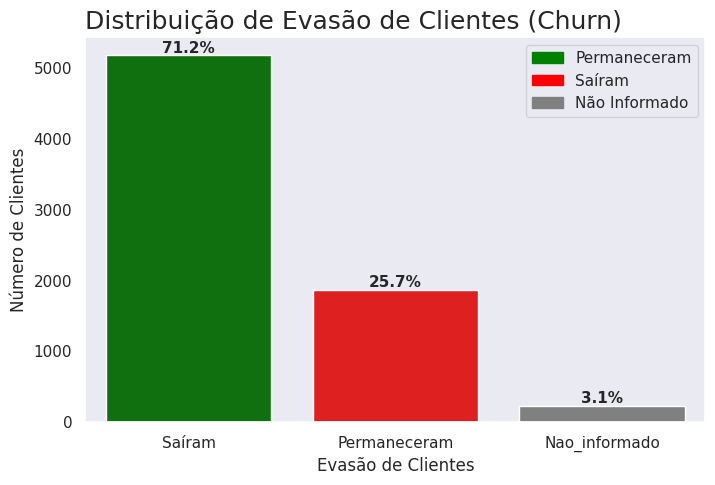

In [79]:
# visualizar a proporção de clientes que permaneceram e os que saíram através de um gráfico

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar avisos
warnings.filterwarnings("ignore")

# Paleta de cores personalizada
paleta_cores = {
    '0': 'green',
    '1': 'red',
    'Nao_informado': 'gray'
}

# Estilo do gráfico
sns.set_theme(style="dark")

# Criar gráfico
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df_clientes['Churn'], data=df_clientes, palette=paleta_cores)

# Título e eixos
plt.title('Distribuição de Evasão de Clientes (Churn)', fontsize=18, loc='left')
plt.ylabel('Número de Clientes')
plt.xlabel('Evasão de Clientes')

# Rótulos legíveis no eixo X
label_map = {'1': 'Permaneceram', '0': 'Saíram', 'Unknown': 'Não Informado'}
xtick_labels = [label_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)

# Adicionar valores percentuais nas barras
total = len(df_clientes)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
handles = [plt.Rectangle((0,0),1,1, color=paleta_cores[key]) for key in paleta_cores]
labels = ['Permaneceram', 'Saíram', 'Não Informado']
plt.legend(handles, labels, loc='upper right')

plt.show()

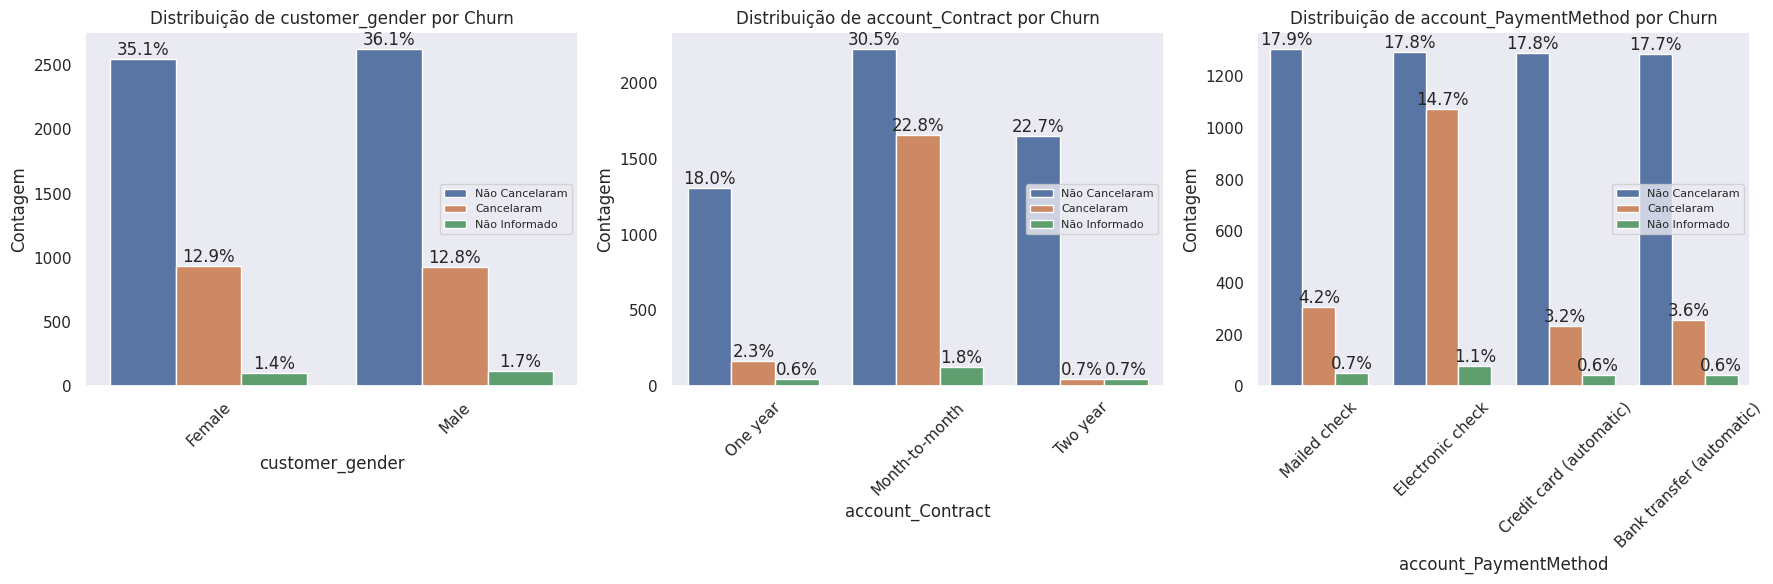

In [80]:
# analisar como a evasão se distribui de acordo com o gênero ('customer_gender'), tipo de contrato ('account_Contract') e método de pagamento ('account_PaymentMethod'),
# através de um gráfico (subplot).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_numericas = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

# plotar o gráfico
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, var in enumerate(variaveis_numericas):
    sns.countplot(data=df_clientes, x=var, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Distribuição de {var} por Churn')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=45)
    labels = ['Não Cancelaram', 'Cancelaram', 'Não Informado']
    axes[i].legend(prop={'size': 8}, loc='center right', labels=labels)

    # Adiciona apenas o percentual nas barras
    for p in axes[i].patches:
      if p.get_height() > 0:
        percentage = f"{p.get_height()/len(df_clientes[var])*100:.1f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')

# exibir o gráfico
plt.tight_layout()
plt.show()


# visualizar uma tabela com o cruzamento de Churn com as colunas 'customer_gender', 'account_Contract', 'account_PaymentMethod'

# Função para mapear os valores de Churn
def map_churn(churn):
    if churn == 0:
        return 'Cancelaram'
    if churn == 1:
        return 'Não Cancelaram'
    else:
        return 'Não informado'

# contar os valores de 'customer_gender'
contagem_genero = df_clientes[['Churn','customer_gender']].copy()
contagem_genero['Churn'] = contagem_genero['Churn'].map(map_churn)
contagem_genero = contagem_genero.value_counts()

# contar os valores de 'account_Contract'
contagem_contrato = df_clientes[['Churn','account_Contract']].copy()
contagem_contrato['Churn'] = contagem_contrato['Churn'].map(map_churn)
contagem_contrato = contagem_contrato.value_counts()

# contar os valores de 'account_PaymentMethod'
contagem_pagamento = df_clientes[['Churn','account_PaymentMethod']].copy()
contagem_pagamento['Churn'] = contagem_pagamento['Churn'].map(map_churn)
contagem_pagamento = contagem_pagamento.value_counts()

# concatenar o resultado das contagens
resultado = pd.concat([contagem_genero, contagem_contrato, contagem_pagamento], keys=['customer_gender', 'account_Contract', 'account_PaymentMethod'])

# Adicionar grid na exibição do DataFrame
grid_styles = [
    {'selector': 'th', 'props': [('border', '1px solid gray'), ('padding', '5px')]},
    {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px')]}
]


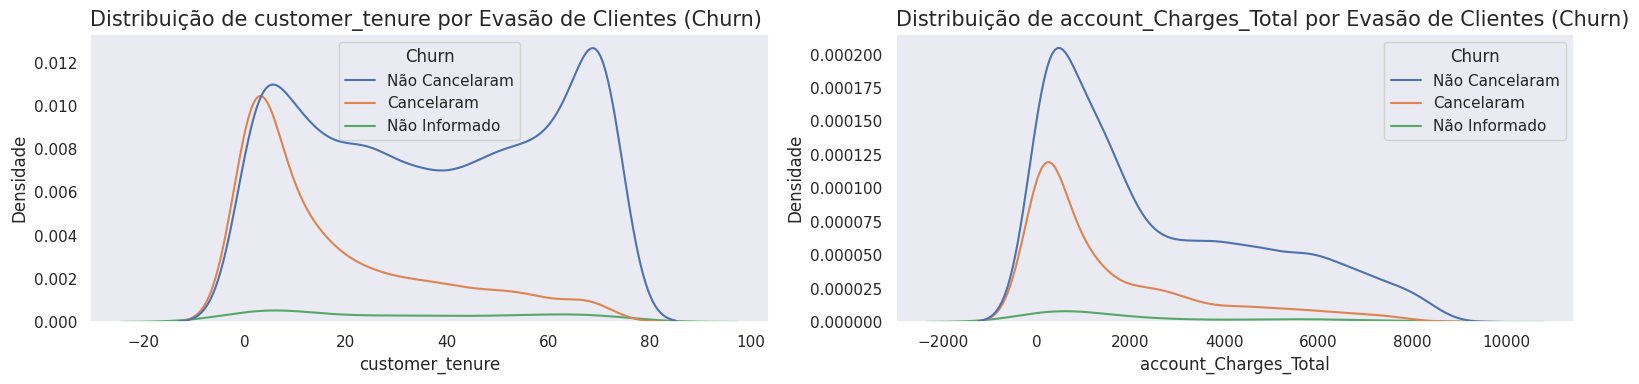

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_numericas = ['customer_tenure', 'account_Charges_Total']

# Criar dicionário de mapeamento para a coluna 'Churn'
churn_map = {0: 'Não Cancelaram', 1: 'Cancelaram', 'Nao_informado': 'Não Informado'}

# plotar gráfico de densidade
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

for i, var in enumerate(variaveis_numericas):
    sns.kdeplot(x=var, hue=df_clientes['Churn'].map(churn_map), data=df_clientes, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var} por Evasão de Clientes (Churn)', loc='left', fontsize=15)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidade')

# exibir o gráfico
plt.tight_layout()
plt.show()

#📄Relatorio Final

# 📊 Análise de Evasão de Clientes (Churn) da TelecomX

---

## 🧭 1. Introdução

O presente relatório tem como objetivo analisar os dados da empresa fictícia **TelecomX**, com foco na **evasão de clientes (Churn)**. A evasão representa a perda de clientes ao longo do tempo, sendo um dos principais desafios enfrentados por empresas de serviços contínuos, como telecomunicações. Identificar padrões e fatores associados ao cancelamento de serviços pode contribuir para a formulação de estratégias de retenção.

---

## 🧹 2. Limpeza e Tratamento de Dados

Foram realizados os seguintes passos de preparação e limpeza dos dados:

- 📥 Leitura do arquivo JSON diretamente de uma URL pública e criação de um DataFrame.
- 🧾 Normalização da estrutura dos dados para facilitar a análise.
- 🔄 Conversão de tipos de dados, incluindo:
  - `account_Charges_Total` para `float64`
- ✅ Padronização de valores categóricos, como “Yes/No” para 1 e 0.
- ⚠️ Substituição de campos em branco na coluna `Churn` por `'Nao_informado'`.
- 🔍 Verificação e tratamento de valores nulos e registros duplicados.
- ➕ Criação de novas colunas como `Contas_Diarias` para entender melhor o comportamento financeiro médio dos clientes.

---

## 📊 3. Análise Exploratória de Dados (EDA)

### 📉 Distribuição de Churn
- A maioria dos clientes **permaneceu na empresa**, porém há uma proporção significativa que cancelou o serviço (26%).

### 📌 Análise por Variáveis Categóricas

#### 3.1. Gênero (`customer_gender`)
- Não houve diferenças significativas de evasão entre os gêneros.

#### 3.2. Tipo de Contrato (`account_Contract`)
- Clientes com contratos **mensais** apresentaram **maior taxa de cancelamento (churn)**.
- Contratos com prazos maiores têm **índices mais baixos de cancelamento**, sugerindo maior fidelização.

#### 3.3. Método de Pagamento (`account_PaymentMethod`)
- Clientes que utilizam **pagamentos eletrônicos automáticos** tiveram maiores taxas de churn.

### 📈 Análise por Variáveis Numéricas

#### 3.4. Tempo de Permanência (`customer_tenure`)
- Clientes com **menor tempo de permanência** (< 10 meses) são os que mais cancelam.
  
#### 3.5. Total de Gastos (`account_Charges_Total`)
- Evasão de clientes (Churn) é mais comum entre clientes com **gastos mais baixos**, sugerindo menor engajamento com os serviços.

---

## ✅ 4. Conclusões e Insights

- **Contratos curtos** e **pagamentos automatizados** estão fortemente associados à evasão.
- Clientes com **menor tempo de relacionamento** com a empresa são mais propensos a cancelar o serviço.
- Estratégias de fidelização e acompanhamento **nos primeiros meses** são cruciais.
- **Educar clientes** sobre as vantagens de contratos de longo prazo pode ajudar a reduzir o churn.

---

## 💡 5. Recomendações

1. **Incentivar contratos anuais ou bianuais** com descontos ou vantagens adicionais.
2. Criar programas de **onboarding e suporte personalizado** para novos clientes (0 a 6 meses).
3. Monitorar de perto os usuários com **gastos baixos e contratos mensais**, aplicando campanhas de retenção direcionadas.
4. Avaliar a experiência de clientes com **pagamento eletrônico automático**, buscando pontos de frustração ou desengajamento.
5. Implementar uma **estratégia preditiva** de churn com base nos dados históricos para ação proativa.

---

